# Multi Layer Perceptrons

The linear model cannot fit all of the data. We can introduce non linearity by including hidden layers that connect each neuron with each other.

![Multi Layer Perceptron](mlps.svg)
A MLP with a fully connected hidden layer. It has 4 inputs, 3 ouputs, 5 hidden units.

MLPs can capture complex interactions among our inputs via their hidden neurons, which depend on the values of each of the inputs. We can model any function, so they are great universal approximators.

A **fully connected** or **dense** layer is one where all neurons are connected to all neurons from the previous layer. The output of a fully connected layer is:
$h(\mathbf{x}) = \phi (\mathbf{W} \mathbf{x} + \mathbf{b})$,

where $\phi()$ is the activation function, $\mathbf{b}$ is the bias vector, $\mathbf{W}$ is the weight vectors, $\mathbf{x}$ is the feature vector. Training a MLP is finding the weights and biases that best


## 1. Activation Functions
Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. We will review the activation functions: 
* **Rectified linear unit (ReLU)**
ReLU provides a very simple nonlinear transformation. 
$ReLU(x)=max(x,0).$
The reason for using ReLU is that its derivatives are particularly well behaved: either they vanish or they just let the argument through. This makes optimization better behaved. These are the most popular activation functions, easier to implement and to train.
* **Sigmoid Function**
The sigmoid function transforms its inputs, for which values lie in the real domain, to outputs that lie on the interval (0, 1). 
$\sigma(x) = \frac{1}{1+\exp(-x)}$ 
The sigmoid function is a smooth, "S-shaped", differentiable approximation to a thresholding unit. Sigmoids are still widely used as activation functions on the output units, when we want to interpret the outputs as probabilities for binary classification problems.

* **Tanh Function**
The yperbolic tangent function is happy middle between the sigmoid and the ReLU as it is slightly more linear near zero.
$\tanh(x) = 2 \sigma(2x) -1$
Tanh is also "S-shaped"

Text(0.5, 1.0, 'activation functions')

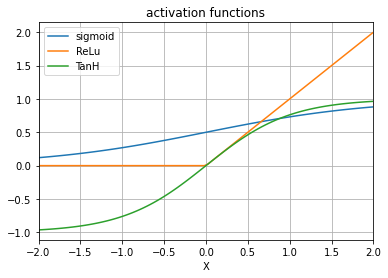

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(-2,2,100)

def sigm(x): # define the sigmoid function
    return 1/(1+np.exp(-x))
def relu(x): # define the Rectified Linear Unit function
    return   np.maximum(x,0)


s = sigm(x)
t = np.tanh(x)
r = relu(x)

plt.plot(x,s)
plt.plot(x,r)
plt.plot(x,t)
plt.grid(True)
plt.legend(['sigmoid','ReLu','TanH'])
plt.xlim([-2,2])
plt.xlabel('X')
plt.title('activation functions')

## 2. Typical MLP structures


A **Regression MLP** outputs scalar values, the number of output neurons is the number of values and the number of the ouput dimensions. For instance, to ouput a 2D geospatial coordinates on a map, you may need to ouput 2 values in 2 output neurons: latitudes and longitudes. For any real scalar as output values, the output layer is a normal layer of neurons. To constrain the value of the outputs, you can add an activation function in the output layer: use a *ReLU* or a *softplus* function for **strictly positive** values and a *sigmoid* or *tanh* activation function for **bounded values** between 0 (or -1) to 1 by scaling the output. A simple representation of a regression MLP is show in the first figure. 


![Regression MLP](MLPReg.png)


A **Classification MLP** outputs the propability of the positive class, a scalar value between 0 and 1. Use a *ReLU* or a *softplus* as an activation function in the output layer.

![Classification MLP](MLPClass.png)

## 2. Training Neural Networks

Training starts by handling a mini-batch of several (but not all) instances. Each time of training is performed is called an **epoch**.

The *forward pass* sends the mini-batch from the input layer to the hidden layers. *Forward propagation* sequentially calculates and stores intermediate variables within the computational graph defined by the neural network. It proceeds from the input to the output layer and makes prediction.

Next, the algorithm measures the error using a loss function and calculate how much each of the ouput connection contributed to the error.

*Backpropagation* sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order. backpropagation is merely an application of chain rule to find the derivatives of cost with respect to any variable in the nested equation. The derivative of cost with respect to any weight in the network, we simply is the multiplication of the corresponding layer’s error times its input. Therefore in training, one has to save each layer input in addition to the weights, and therefore requires additional memory compared to a simple forward pass (prediction).

The algorithm then performs Gradient Descent to update the weights.

**Drop out**
One additional mitigation against overfitting is to use dropout layers during training. During training, the Dropout layer will randomly drop out outputs of the previous layer (or equivalently, the inputs to the subsequent layer) according to the specified dropout probability. Dropout is only used during training.

![Multi Layer Perceptron](dropout2.svg)


a **Sequential** model is a single branch MLP. 


## 3. MLP in Keras

In [17]:
import tensorflow as tf
from tensorflow import keras

In [31]:
# load the fashion MNIST data. it's boring, but it works!

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["tshirt","trousers","pullover","dress","coat","sandal","shirt","sneaker","bag","boot"]
#there are 10 classes in the data sets
print(len(class_names))

10


In [26]:
print(X_train_full.shape)
print(X_train_full.dtype)
print(np.min(X_train_full[1,:,:]),np.max(X_train_full[1,:,:]))
print(class_names[y_train[0]])

(60000, 28, 28)
uint8
0 255


The data set is already split between training and testing sets. But there is not validation set yet. We also will need to scale the data to use GD. The values of the data range between 0 and 255. So we can just normalize them to 255 for scaling. We will first do a crude split between training and validating.


In [28]:
X_val,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_val,y_train = y_train_full[:5000],y_train_full[5000:]

Let's create a Classification MLP for a multi-class problem. We use a flatten input layer to turn the 28x28 matrix into a 1D vector. The

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # reshape the 2D matrix into a 1D vector, without modifying the values
model.add(keras.layers.Dense(300,activation="relu")) # single dense layer, downsampling from input layer to this year from 784 points to 300.
model.add(keras.layers.Dense(100,activation="relu")) # 100 neurons
model.add(keras.layers.Dense(10,activation="softmax")) # output layer, 10 neurons since there are 10 classes.

In [33]:
model = keras.models.Sequential( [
keras.layers.Flatten(input_shape=[28,28]), # reshape the 2D matrix into a 1D vector, without modifying the values
keras.layers.Dense(300,activation="relu"), # single dense layer, downsampling from input layer to this year from 784 points to 300.
keras.layers.Dense(100,activation="relu"), # 100 neurons
keras.layers.Dense(10,activation="softmax") ]) # output layer, 10 neurons since there are 10 classes.

In [37]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


Get the properties of each layer

In [39]:
L1 = model.layers[1]
print(L1.name)
w,b = L1.get_weights()
print("initialized weights")
print(w)
print(w.shape)
print("initialized biases")
print(b)
print(b.shape)

dense_6
initialized weights
[[-0.00814538 -0.03027174 -0.07386035 ...  0.0458733   0.06985845
  -0.025172  ]
 [ 0.03256713 -0.06009654 -0.03741575 ... -0.06845641  0.03898153
  -0.06552993]
 [ 0.02121779 -0.07328574  0.05836841 ... -0.05685415 -0.06445601
  -0.04741516]
 ...
 [ 0.02453244  0.01921134  0.03246373 ...  0.04681103 -0.01296708
  -0.03949266]
 [-0.05003146 -0.02811283  0.02461205 ... -0.00389059 -0.04133076
   0.06003419]
 [ 0.02773331 -0.0580985   0.02884672 ...  0.01298088 -0.06907778
  -0.01312438]]
(784, 300)
initialized biases
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

### Define the optimizer

Choose an optimizer to train the algorithm: https://keras.io/api/optimizers/. Choose hyperparameters.

In [63]:
alpha = 0.005# learning rate lr
optimizer = keras.optimizers.SGD(lr=alpha) # stochastic gradient descent

### Compile the model

Compile the model by setting the loss function, the optimizer to user, and the metrics to use during training and evaluation

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics="accuracy")

### Train and evaluate the model

During the fitting, it may be important to save intermediate steps and maybe revert back to earlier version of the training. For this, we will use **checkpoints** to save the model at regular intervals during the training.

In [61]:
checkpoints_cb = keras.callbacks.ModelCheckpoint("my_first_NN_model.h5",save_best_only=True)
# with the argument save_best_only, the checkpoint saved will be one that of best performance according to the performance metrics chosen.
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val),callbacks=[checkpoints_cb])

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1286 - accuracy: 0.9507 - val_loss: 0.4479 - val_accuracy: 0.8920
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1240 - accuracy: 0.9523 - val_loss: 0.4297 - val_accuracy: 0.8920
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1215 - accuracy: 0.9534 - val_loss: 0.4163 - val_accuracy: 0.8982
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1183 - accuracy: 0.9539 - val_loss: 0.4248 - val_accuracy: 0.8896
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1169 - accuracy: 0.9553 - val_loss: 0.4406 - val_accuracy: 0.8952
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.9569 - val_loss: 0.5093 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1144 - accuracy: 0.9565 - val_loss: 0.4738 - val_accuracy:

Text(0.5, 0, 'epochs')

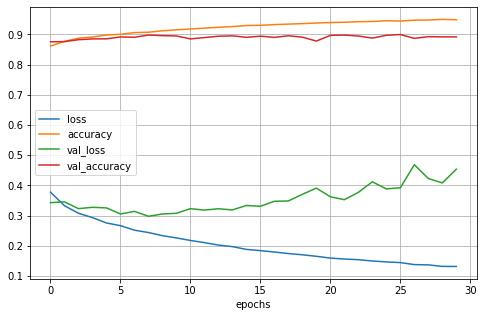

In [48]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('epochs')

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1000us/step - loss: 102.3985 - accuracy: 0.8648


[102.39849090576172, 0.864799976348877]

In [56]:
X_new = X_test[:2]
y_proba = model.predict(X_new).round(2)
print(y_proba)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


## 4. Saving and restoring a model

In [58]:
model.save("my_first_NN.h5")
model2=keras.models.load_model("my_first_NN.h5")

## 5. Fine-tuning of Neural Networks Hyperparameters

Trial and error is a great first step to build some basic intuition around NN and their training. However, a more systematic approach is to search the hyper-parameter space using grid search or randomized searches. 
Scikit-learn has modules dedicated to this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

We will need to bundle our keras-built model into a function callabe by scikit-learn. This is done using the ``KerasRegressor`` and ``KerasClassifer`` objects.
More on this later!

### MLP with scikit learn
There are some basic NN built in scikit learn, you can see below a tutorial. However, it is limited and one would use pytorch or keras or tensorflow to for any moderate to large model training. Here we will use a "sparse" categorical cross entropy. Cross entropy is used in multiclass classification. Categorical is because the classes are exclusive and that we have sparse labels (either 0 or 1).

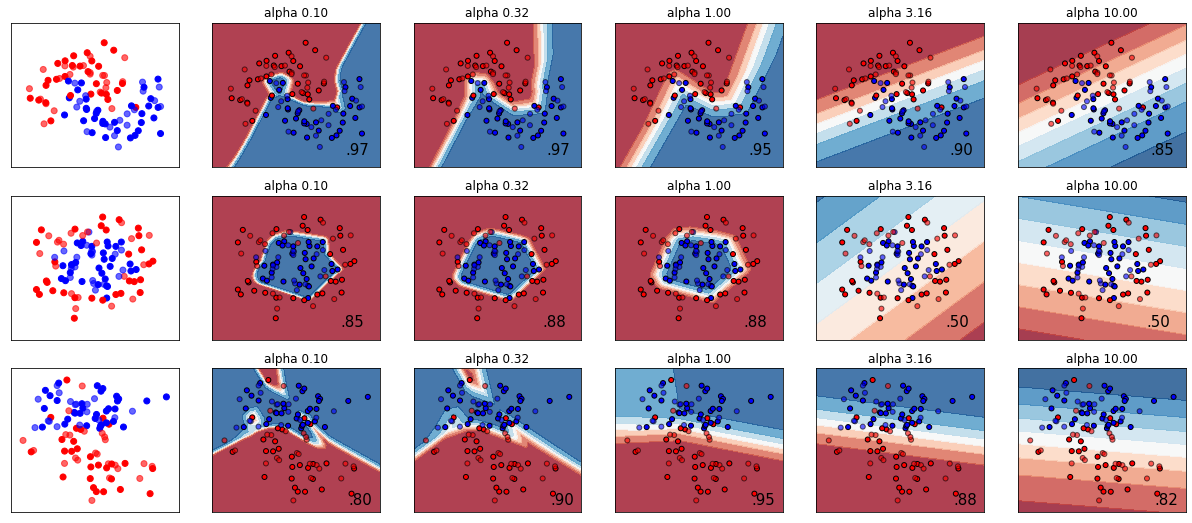

In [2]:
# Below is an exampled of a classification MLP using Scikit learn.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh
alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()